In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 3471.5, 4623.5, -0.5)

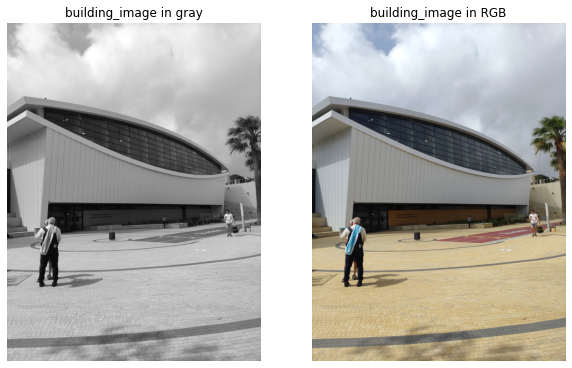

In [10]:
#2.a
building_img = cv2.imread("../my_data/building.jpg")
building_gray = cv2.cvtColor(building_img, cv2.COLOR_BGR2GRAY)
building_RGB = cv2.cvtColor(building_img, cv2.COLOR_BGR2RGB)

figure_1 = plt.figure(figsize=(10,10))
building_gray_img = figure_1.add_subplot(1, 2, 1)
building_gray_img.set_title("building_image in gray")
building_gray_img.imshow(building_gray ,cmap='gray')
plt.axis('off')

building_RGB_img = figure_1.add_subplot(1, 2, 2)
building_RGB_img .set_title("building_image in RGB")
building_RGB_img .imshow(building_RGB)
plt.axis('off')



(-0.5, 3471.5, 4623.5, -0.5)

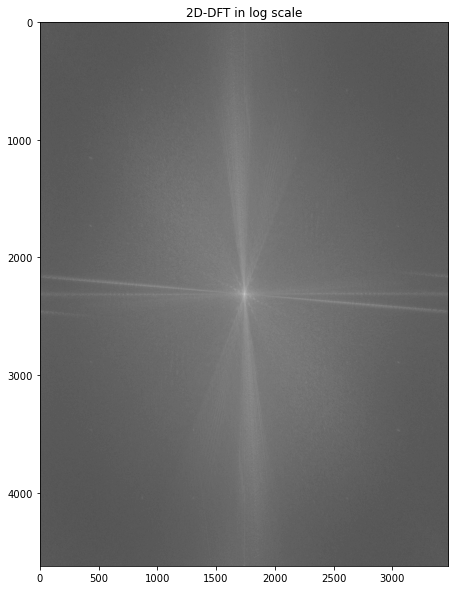

In [11]:
#2.b
fft = np.fft.fft2(building_gray)
fft_shifted = np.fft.fftshift(fft)

figure_2 = plt.figure(figsize=(10,10))
fft_img = figure_2.add_subplot(1, 1, 1)
fft_img.set_title("2D-DFT in log scale")
fft_img.imshow(np.log(1 + np.abs(fft_shifted)), cmap='gray')  
plt.axis('on')


(-0.5, 3471.5, 4623.5, -0.5)

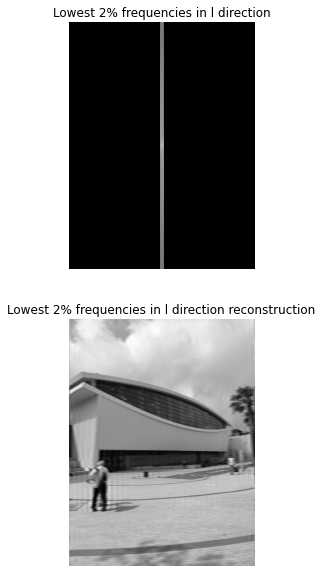

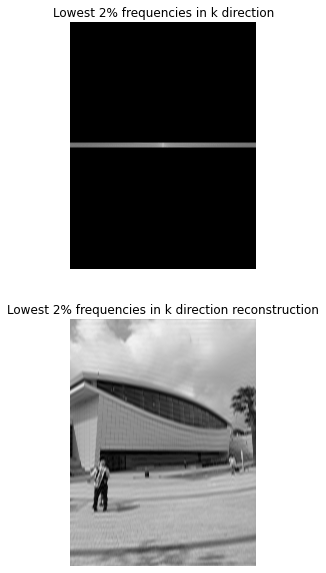

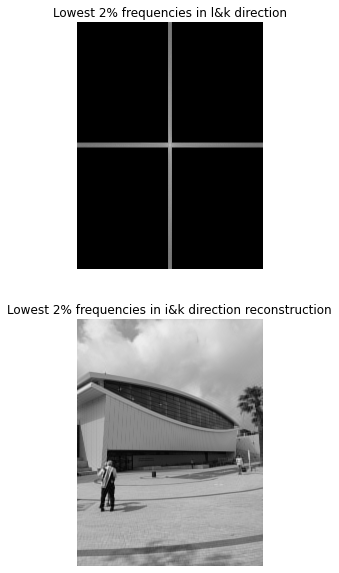

In [12]:
#2.c
height,width = fft_shifted.shape
lowest_l = int(0.02 * width)
lowest_k = int(0.02 * height)
l_index = (int((width - lowest_l) / 2), int((width + lowest_l) / 2))
k_index = (int((height - lowest_k) / 2), int((height + lowest_k) / 2))

zeros_l = np.zeros(fft_shifted.shape)
zeros_k = np.zeros(fft_shifted.shape)
zeros_l_k = np.zeros(fft_shifted.shape)

zeros_l[:,l_index[0]:l_index[1]] = 1
zeros_k[k_index[0]:k_index[1],:] = 1
zeros_l_k[k_index[0]:k_index[1],:] = 1
zeros_l_k[:,l_index[0]:l_index[1]] = 1

fft_low_1 = fft_shifted * zeros_l
fft_low_2 = fft_shifted * zeros_k
fft_low_3 = fft_shifted * zeros_l_k


reco_building_1=np.fft.ifft2(np.fft.ifftshift(fft_low_1))
reco_building_1_Abs=np.abs(reco_building_1)

reco_building_2=np.fft.ifft2(np.fft.ifftshift(fft_low_2))
reco_building_2_Abs=np.abs(reco_building_2)

reco_building_3=np.fft.ifft2(np.fft.ifftshift(fft_low_3))
reco_building_3_Abs=np.abs(reco_building_3)


figure_3 = plt.figure(figsize=(10,10))
fft_low_l = figure_3.add_subplot(2, 1, 1)
fft_low_l.set_title("Lowest 2% frequencies in l direction")
fft_low_l.imshow(np.log(1 + np.abs(fft_low_1)), cmap="gray")  
plt.axis('off')
reco_low_l = figure_3.add_subplot(2, 1, 2)
reco_low_l.set_title("Lowest 2% frequencies in l direction reconstruction")
reco_low_l.imshow(reco_building_1_Abs, cmap="gray")  
plt.axis('off')


figure_4 = plt.figure(figsize=(10,10))
fft_low_k = figure_4.add_subplot(2, 1, 1)
fft_low_k.set_title("Lowest 2% frequencies in k direction")
fft_low_k.imshow(np.log(1 + np.abs(fft_low_2)), cmap="gray")  
plt.axis('off')
reco_low_k = figure_4.add_subplot(2, 1, 2)
reco_low_k.set_title("Lowest 2% frequencies in k direction reconstruction")
reco_low_k.imshow(reco_building_2_Abs, cmap="gray")  
plt.axis('off')


figure_5 = plt.figure(figsize=(10,10))
fft_low = figure_5.add_subplot(2, 1, 1)
fft_low.set_title("Lowest 2% frequencies in l&k direction")
fft_low.imshow(np.log(1 + np.abs(fft_low_3)), cmap="gray")  
plt.axis('off')
reco_low = figure_5.add_subplot(2, 1, 2)
reco_low.set_title("Lowest 2% frequencies in i&k direction reconstruction")
reco_low.imshow(reco_building_3_Abs, cmap="gray")  
plt.axis('off')

   

(-0.5, 3471.5, 4623.5, -0.5)

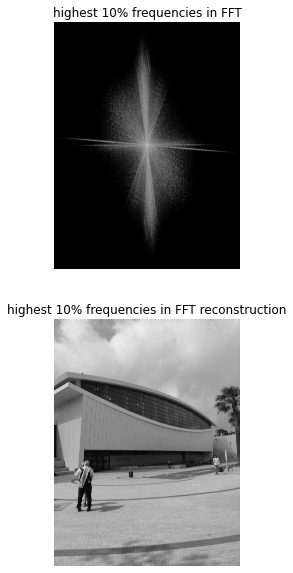

In [13]:
#2.d
def max_freq_filtering(fshift, precentege):
    fMaxFreq = fshift.copy()
    fshift_one_Dim = np.sort(np.abs(fMaxFreq.flatten()))
    t_index = int(fshift_one_Dim.size * precentege / 100)
    th=fshift_one_Dim[-t_index]
    fMaxFreq[(np.abs(fshift) < th)]=0
    imgMaxFreq=np.abs(np.fft.ifft2(np.fft.ifftshift(fMaxFreq))) #idft the new fft
    return fMaxFreq, imgMaxFreq

percentage = 10
fft_max_freq, img_max_freq = max_freq_filtering(fft_shifted, percentage)


figure_6 = plt.figure(figsize=(10,10))
fft_max = figure_6.add_subplot(2, 1, 1)
fft_max.set_title("highest 10% frequencies in FFT")
fft_max.imshow(np.log(1 + np.abs(fft_max_freq)), cmap="gray")  
plt.axis('off')
reco_max = figure_6.add_subplot(2, 1, 2)
reco_max.set_title("highest 10% frequencies in FFT reconstruction")
reco_max.imshow(img_max_freq, cmap="gray")  
plt.axis('off')


(-0.5, 3471.5, 4623.5, -0.5)

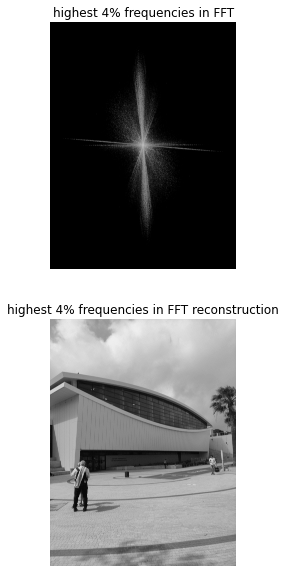

In [14]:
#2.e
percentage = 4
fft_max_freq_4, img_max_freq_4 = max_freq_filtering(fft_shifted, percentage)


figure_7 = plt.figure(figsize=(10,10))
fft_max = figure_7.add_subplot(2, 1, 1)
fft_max.set_title("highest 4% frequencies in FFT")
fft_max.imshow(np.log(1 + np.abs(fft_max_freq_4)), cmap="gray")  
plt.axis('off')
reco_max = figure_7.add_subplot(2, 1, 2)
reco_max.set_title("highest 4% frequencies in FFT reconstruction")
reco_max.imshow(img_max_freq_4, cmap="gray")  
plt.axis('off')



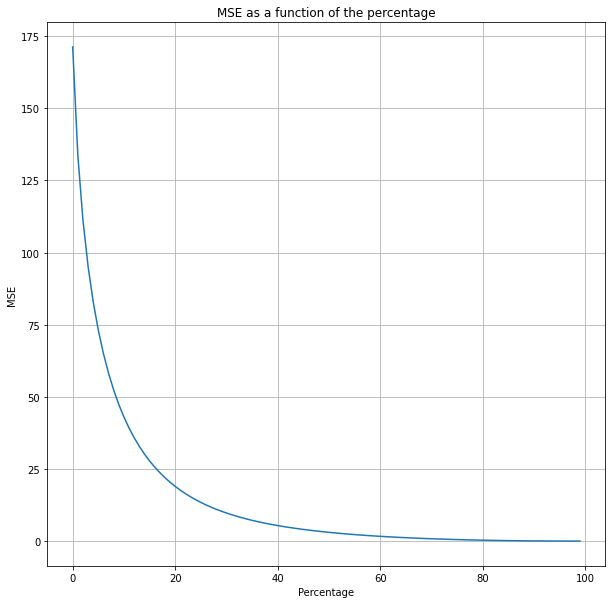

In [16]:
#2.f
mse = np.zeros(100)
for p in range(1, 101):
    fft_max_freq_p, img_max_freq_p = max_freq_filtering(fft_shifted, p)
    mse[p - 1] = ((building_gray - img_max_freq_p) ** 2).mean()

figure_8 = plt.figure(figsize=(10,10))
ax = figure_8.add_subplot(1, 1, 1)
ax.plot(mse)
ax.set_xlabel("Percentage")
ax.set_ylabel("MSE")
ax.set_title("MSE as a function of the percentage")
ax.grid()
